<a href="https://colab.research.google.com/github/anthonymirandag/IndoorLocalization/blob/master/FingerprintingIndoorLocalizationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.** Importacion de librerias

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
!pip install tensorflow-gpu==2.0.0.alpha0
import datetime
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2.** Preprocedado de datos

## Carga de datos

In [0]:
drive_path = "/content/gdrive/My Drive/ProyectoTesis/datasets"
df = pd.read_csv(drive_path+'/Tx_full.csv')

In [0]:
target_label =  'Sector'

x = df.drop(target_label , axis= 1)
y = df[target_label]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
#y = df[target_label].astype(int) - 1 

## Normalizacion de los datos de entrada


In [0]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [30]:
x

array([[ 0.10518246,  0.98342957,  1.87879222, -0.32343564, -0.03082775],
       [ 0.61971557, -0.25637626,  1.59255362,  0.02782819,  1.05202996],
       [-0.06632858,  0.82845384,  1.87879222, -0.32343564, -0.21130404],
       ...,
       [-0.23783962,  0.82845384, -0.6973552 , -1.55285907,  1.41298253],
       [-0.23783962,  0.98342957, -0.6973552 , -1.37722715,  1.41298253],
       [-0.23783962,  0.82845384, -0.6973552 , -0.8503314 ,  1.41298253]])

## Division del conjunto de datos


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.10, random_state=27)

# **3.** Creacion del modelo : 
### Percentron multicapa.
 Hiperparametros :
* 3 capas ocultas con 128 neuronas
* Capa de activacion rectificador uniforme
* learning rate = 0.00001
* optimazador adam



In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))

### Compilar modelo

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

### Entranar el modelo

In [40]:
history = model.fit(x_train, y_train, validation_split=0.25 ,batch_size=64, epochs=200 , verbose = 1)

Train on 8268 samples, validate on 2757 samples
Epoch 1/200
8268/8268 [==============================] - 1s 88us/sample - loss: 1.9570 - sparse_categorical_accuracy: 0.4028 - val_loss: 1.4351 - val_sparse_categorical_accuracy: 0.5078
Epoch 2/200
8268/8268 [==============================] - 1s 67us/sample - loss: 1.2961 - sparse_categorical_accuracy: 0.5582 - val_loss: 1.2133 - val_sparse_categorical_accuracy: 0.5778
Epoch 3/200
8268/8268 [==============================] - 1s 67us/sample - loss: 1.1349 - sparse_categorical_accuracy: 0.6110 - val_loss: 1.0917 - val_sparse_categorical_accuracy: 0.6318
Epoch 4/200
8268/8268 [==============================] - 1s 69us/sample - loss: 1.0425 - sparse_categorical_accuracy: 0.6427 - val_loss: 1.0287 - val_sparse_categorical_accuracy: 0.6554
Epoch 5/200
8268/8268 [==============================] - 1s 66us/sample - loss: 0.9796 - sparse_categorical_accuracy: 0.6638 - val_loss: 0.9815 - val_sparse_categorical_accuracy: 0.6638
Epoch 6/200
8268/8268 

### Plot training & validation accuracy values
### Plot training & validation loss values


In [0]:
def visualzation_accuracy_loss_values_epochs(history):
  fig, axs = plt.subplots(1, 2,figsize=(15, 5))
  axs[0].plot(history.history['sparse_categorical_accuracy'])
  axs[0].plot(history.history['val_sparse_categorical_accuracy'])
  axs[0].set_title('Model accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['Train', 'Test'], loc='upper left')
  axs[1].plot(history.history['loss'])
  axs[1].plot(history.history['val_loss'])
  axs[1].set_title('Model loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['Train', 'Test'], loc='upper left')


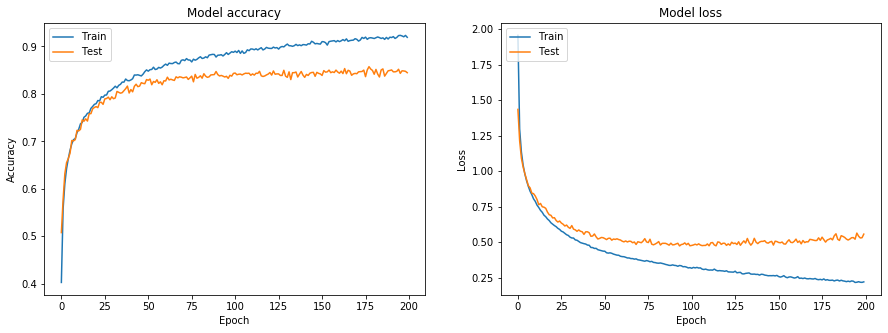

In [42]:
visualzation_accuracy_loss_values_epochs(history)

### Evaluación del modelo y predicción

In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 68us/sample - loss: 0.6039 - sparse_categorical_accuracy: 0.8271
Test accuracy: 0.8270799517631531


## Metodos de regularizacion



#### L2 & L1 regularization

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64,kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01),activation='relu'))
model.add(tf.keras.layers.Dense(units=64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01) ,activation='relu'))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_split=0.25 ,batch_size=64, epochs=50 , verbose = 1)

Train on 8268 samples, validate on 2757 samples
Epoch 1/50
8268/8268 [==============================] - 1s 98us/sample - loss: 49.6638 - sparse_categorical_accuracy: 0.1651 - val_loss: 17.3538 - val_sparse_categorical_accuracy: 0.0773
Epoch 2/50
8268/8268 [==============================] - 1s 68us/sample - loss: 6.2967 - sparse_categorical_accuracy: 0.0854 - val_loss: 2.8287 - val_sparse_categorical_accuracy: 0.0773
Epoch 3/50
8268/8268 [==============================] - 1s 68us/sample - loss: 2.8109 - sparse_categorical_accuracy: 0.0854 - val_loss: 2.8111 - val_sparse_categorical_accuracy: 0.0773
Epoch 4/50
8268/8268 [==============================] - 1s 69us/sample - loss: 2.8035 - sparse_categorical_accuracy: 0.0854 - val_loss: 2.8072 - val_sparse_categorical_accuracy: 0.0773
Epoch 5/50
8268/8268 [==============================] - 1s 68us/sample - loss: 2.8016 - sparse_categorical_accuracy: 0.0854 - val_loss: 2.8074 - val_sparse_categorical_accuracy: 0.0773
Epoch 6/50
8268/8268 [===

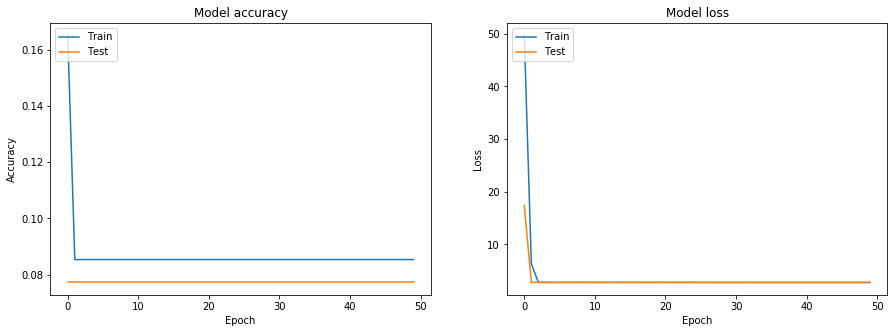

In [17]:
visualzation_accuracy_loss_values_epochs(history)

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 69us/sample - loss: 2.7983 - sparse_categorical_accuracy: 0.0889
Test accuracy: 0.08890701830387115


#### Dropout

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [45]:
history = model.fit(x_train, y_train, validation_split=0.25 ,batch_size=64, epochs=200 , verbose = 1)

Train on 8268 samples, validate on 2757 samples
Epoch 1/200
8268/8268 [==============================] - 1s 97us/sample - loss: 1.9986 - sparse_categorical_accuracy: 0.3806 - val_loss: 1.4675 - val_sparse_categorical_accuracy: 0.5165
Epoch 2/200
8268/8268 [==============================] - 1s 68us/sample - loss: 1.4099 - sparse_categorical_accuracy: 0.5204 - val_loss: 1.2570 - val_sparse_categorical_accuracy: 0.5709
Epoch 3/200
8268/8268 [==============================] - 1s 63us/sample - loss: 1.2485 - sparse_categorical_accuracy: 0.5712 - val_loss: 1.1278 - val_sparse_categorical_accuracy: 0.6181
Epoch 4/200
8268/8268 [==============================] - 1s 68us/sample - loss: 1.1560 - sparse_categorical_accuracy: 0.6045 - val_loss: 1.0645 - val_sparse_categorical_accuracy: 0.6340
Epoch 5/200
8268/8268 [==============================] - 1s 63us/sample - loss: 1.0939 - sparse_categorical_accuracy: 0.6229 - val_loss: 1.0233 - val_sparse_categorical_accuracy: 0.6442
Epoch 6/200
8268/8268 

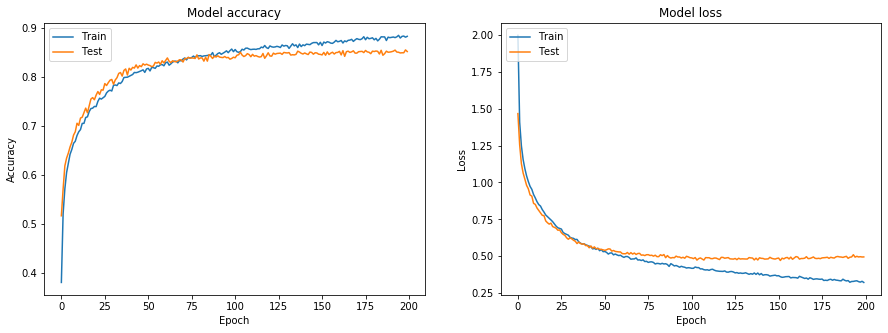

In [46]:
visualzation_accuracy_loss_values_epochs(history)

In [47]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 64us/sample - loss: 0.5043 - sparse_categorical_accuracy: 0.8475
Test accuracy: 0.8474714756011963


#### Early Stopping

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [50]:
history = model.fit(x_train, y_train, validation_split=0.25 ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 8268 samples, validate on 2757 samples
Epoch 1/200
8268/8268 [==============================] - 1s 83us/sample - loss: 1.9681 - sparse_categorical_accuracy: 0.4034 - val_loss: 1.4058 - val_sparse_categorical_accuracy: 0.5172
Epoch 2/200
8268/8268 [==============================] - 1s 63us/sample - loss: 1.2561 - sparse_categorical_accuracy: 0.5666 - val_loss: 1.1572 - val_sparse_categorical_accuracy: 0.5999
Epoch 3/200
8268/8268 [==============================] - 1s 65us/sample - loss: 1.0887 - sparse_categorical_accuracy: 0.6218 - val_loss: 1.0747 - val_sparse_categorical_accuracy: 0.6231
Epoch 4/200
8268/8268 [==============================] - 1s 64us/sample - loss: 0.9973 - sparse_categorical_accuracy: 0.6499 - val_loss: 1.0033 - val_sparse_categorical_accuracy: 0.6347
Epoch 5/200
8268/8268 [==============================] - 1s 62us/sample - loss: 0.9362 - sparse_categorical_accuracy: 0.6709 - val_loss: 0.9382 - val_sparse_categorical_accuracy: 0.6707
Epoch 6/200
8268/8268 

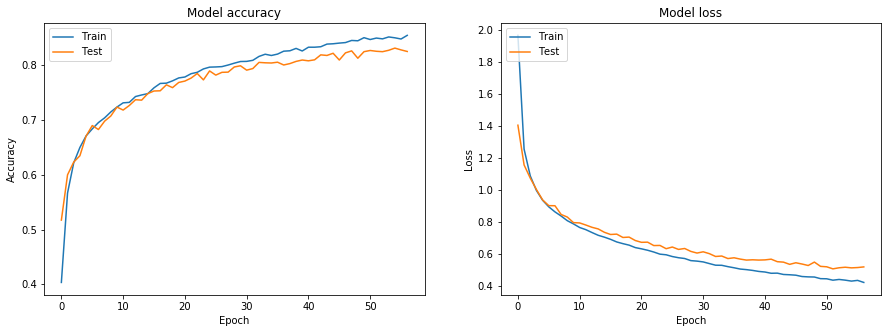

In [51]:
visualzation_accuracy_loss_values_epochs(history)

In [52]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 79us/sample - loss: 0.5379 - sparse_categorical_accuracy: 0.8148
Test accuracy: 0.8148450255393982


####Dropout +  Early Stopping


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [55]:
history = model.fit(x_train, y_train, validation_split=0.25 ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 8268 samples, validate on 2757 samples
Epoch 1/200
8268/8268 [==============================] - 1s 91us/sample - loss: 2.0910 - sparse_categorical_accuracy: 0.3449 - val_loss: 1.4729 - val_sparse_categorical_accuracy: 0.5194
Epoch 2/200
8268/8268 [==============================] - 1s 67us/sample - loss: 1.4220 - sparse_categorical_accuracy: 0.5134 - val_loss: 1.2135 - val_sparse_categorical_accuracy: 0.5738
Epoch 3/200
8268/8268 [==============================] - 1s 63us/sample - loss: 1.2341 - sparse_categorical_accuracy: 0.5783 - val_loss: 1.1010 - val_sparse_categorical_accuracy: 0.6097
Epoch 4/200
8268/8268 [==============================] - 1s 66us/sample - loss: 1.1408 - sparse_categorical_accuracy: 0.6132 - val_loss: 1.0429 - val_sparse_categorical_accuracy: 0.6286
Epoch 5/200
8268/8268 [==============================] - 1s 66us/sample - loss: 1.0783 - sparse_categorical_accuracy: 0.6272 - val_loss: 0.9984 - val_sparse_categorical_accuracy: 0.6442
Epoch 6/200
8268/8268 

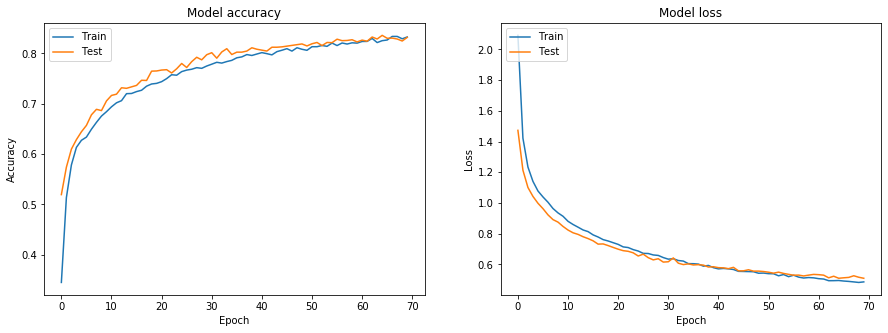

In [56]:
visualzation_accuracy_loss_values_epochs(history)

In [57]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 68us/sample - loss: 0.5102 - sparse_categorical_accuracy: 0.8320
Test accuracy: 0.8319739103317261


#### DataAgumentation
Se prueban dos esquemas de aumento de datos : 
* El primer esquema genera por cada fila el total del numero de puntos de acceso leidos para el sector. Restando un valor fijo a acado valor rssi
*  El segundo esquema genera un total de datos establecidos en variable global por cada file generandose de manera aleatoria los rsi en el rando entre la media por sector y el valor rssi leido. 

##### **Esquema** 1

In [0]:
def data_augmentation_esq1(df,add_value):
  list_values = list()
  for row in df.values:
    list_values.append(tuple(row))
    for index,value in enumerate(row[0:-1]):
      new_row = row.copy()
      new_row[index] -= add_value 
      list_values.append(tuple(new_row))
  columns = df.columns
  data_aug  = pd.DataFrame(list_values,columns=columns)   
  return data_aug  

##### **Esquema** 2

In [0]:
import random
def data_augmentation_esq2(df,global_value):
  list_values = list()
  sectors = df['Sector'].unique()
  for sector  in sectors:
    df_sector = df[df.Sector == sector]
    means_rssi = df_sector[df_sector.columns[0:-1]].mean()
    for row in df_sector.values:
      list_values.append(tuple(row))
      list_rssi = list()
      for index,rssi in enumerate(row[0:-1]):
        range_random =abs(means_rssi[index] - rssi)
        list_rssi.append((rssi,range_random))
      for i in range(global_value):
        new_row = list()
        for value in list_rssi:
          if(value[1] !=0):
            new_rssi = round(random.uniform(rssi,rssi+value[1]),2)
            new_row.append(new_rssi)
          else:  
            new_row.append(value[0])
        new_row.append(sector)
        list_values.append(tuple(new_row))
  columns = df.columns
  data_aug  = pd.DataFrame(list_values,columns=columns)   
  return data_aug  

In [0]:
data_train, data_test = train_test_split(df, test_size= 0.10, random_state=27)

In [0]:
target_label =  'Sector'

x_test = data_test.drop(target_label , axis= 1)
y_test = data_test[target_label]
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y)

In [79]:
data_train.shape

(11025, 6)

#### Preprosesado de datos

In [0]:
data_train_sh1 = data_augmentation_esq1(data_train,5)
data_train_sh2 = data_augmentation_esq2(data_train,10)

In [153]:
data_train_sh1.shape

(66150, 6)

In [154]:
data_train_sh2.shape

(121275, 6)

In [84]:
data_aug_sh2.shape

(121275, 6)

In [0]:
x_test = data_test.drop(target_label , axis= 1)
y_test = data_test[target_label]
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [0]:
x_train_sh1 = data_train_sh1.drop(target_label , axis= 1).values
y_train_sh1 = data_train_sh1[target_label]
labelencoder_y = LabelEncoder()
y_train_sh1 = labelencoder_y.fit_transform(y_train_sh1)

array([ 0,  0,  0, ..., 14, 14, 14])

In [0]:
x_train_sh2 = data_train_sh2.drop(target_label , axis= 1).values
y_train_sh2 = data_train_sh2[target_label]
labelencoder_y = LabelEncoder()
y_train_sh2 = labelencoder_y.fit_transform(y_train_sh2)

#### Normalizar los datos

In [0]:
scaler = StandardScaler()
scaler.fit(x_train_sh1)
x_train_sh1 = scaler.transform(x_train_sh1)
scaler = StandardScaler()
scaler.fit(x_train_sh2)
x_train_sh2 = scaler.transform(x_train_sh2)
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_sh1,y_train_sh1, test_size= 0.25, random_state=27)

#### Esquema 1 DataAgumentation + Dropout +  Early Stopping

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [162]:
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 49612 samples, validate on 16538 samples
Epoch 1/200
49612/49612 [==============================] - 3s 68us/sample - loss: 1.5117 - sparse_categorical_accuracy: 0.4891 - val_loss: 1.1989 - val_sparse_categorical_accuracy: 0.5774
Epoch 2/200
49612/49612 [==============================] - 3s 66us/sample - loss: 1.2129 - sparse_categorical_accuracy: 0.5712 - val_loss: 1.0967 - val_sparse_categorical_accuracy: 0.6131
Epoch 3/200
49612/49612 [==============================] - 3s 65us/sample - loss: 1.1317 - sparse_categorical_accuracy: 0.6025 - val_loss: 1.0435 - val_sparse_categorical_accuracy: 0.6309
Epoch 4/200
49612/49612 [==============================] - 3s 66us/sample - loss: 1.0782 - sparse_categorical_accuracy: 0.6191 - val_loss: 0.9937 - val_sparse_categorical_accuracy: 0.6497
Epoch 5/200
49612/49612 [==============================] - 3s 64us/sample - loss: 1.0344 - sparse_categorical_accuracy: 0.6369 - val_loss: 0.9582 - val_sparse_categorical_accuracy: 0.6619
Epoch 6/20

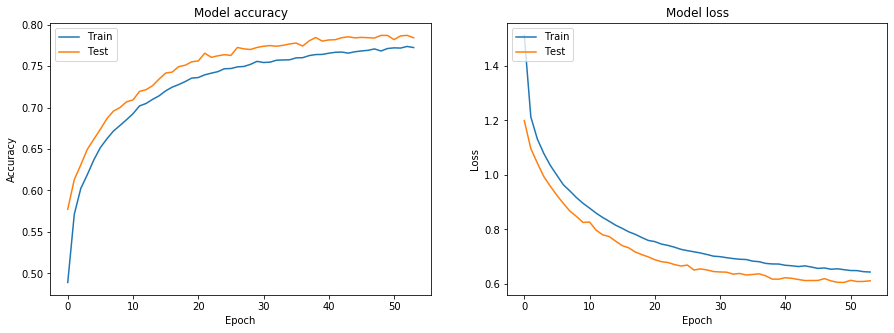

In [164]:
visualzation_accuracy_loss_values_epochs(history)

In [167]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 75us/sample - loss: 0.6992 - sparse_categorical_accuracy: 0.7365
Test accuracy: 0.7365415692329407


#### Esquema 2 DataAgumentation + Dropout +  Early Stopping

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_sh2,y_train_sh2, test_size= 0.25, random_state=27)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(5, )))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=15, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [182]:
history = model.fit(x_train_sh2, y_train_sh2, validation_data=(x_val,y_val) ,callbacks=[monitor],batch_size=64, epochs=200 , verbose = 1)

Train on 121275 samples, validate on 30319 samples
Epoch 1/200
121275/121275 [==============================] - 8s 63us/sample - loss: 1.9075 - sparse_categorical_accuracy: 0.3666 - val_loss: 1.6012 - val_sparse_categorical_accuracy: 0.4745
Epoch 2/200
121275/121275 [==============================] - 7s 61us/sample - loss: 1.6250 - sparse_categorical_accuracy: 0.4642 - val_loss: 1.5157 - val_sparse_categorical_accuracy: 0.4987
Epoch 3/200
121275/121275 [==============================] - 7s 60us/sample - loss: 1.5606 - sparse_categorical_accuracy: 0.4848 - val_loss: 1.4648 - val_sparse_categorical_accuracy: 0.5121
Epoch 4/200
121275/121275 [==============================] - 7s 60us/sample - loss: 1.5241 - sparse_categorical_accuracy: 0.4957 - val_loss: 1.4362 - val_sparse_categorical_accuracy: 0.5270
Epoch 5/200
121275/121275 [==============================] - 7s 61us/sample - loss: 1.4976 - sparse_categorical_accuracy: 0.5043 - val_loss: 1.4076 - val_sparse_categorical_accuracy: 0.5319

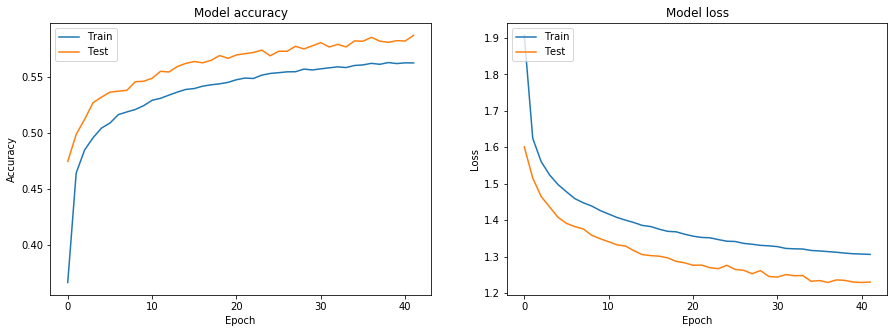

In [183]:
visualzation_accuracy_loss_values_epochs(history)

In [184]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

1226/1226 [==============================] - 0s 62us/sample - loss: 5.4114 - sparse_categorical_accuracy: 0.1974
Test accuracy: 0.1973898857831955
